<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart8ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 8

##Ordinary Differential Equations

In [16]:
#Load your packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

While there is a lot we could say about ordinary differential equations, we will focus on one type, first order linear differential equation.  There are many ways to solve these (seperable, integrating factor, just integrate...)
$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$
  My guess is that many of you have not taken diff eq, so I will not solve these analytically.

I am going to look at the equation,
$$
\frac{dy}{dx} = \sin x\left(1-y\right)\quad\quad y(0) = 2
$$
According to the assignment the solution should be,
$$
y(x) = 1+ e^{\cos x-1}
$$
Just quickly I'll check that this makes sense.  Clearly $y(0) = 2$ and then I can note that
$$
y'(x) = -\sin x e^{\cos x -1}
$$
which if I plug into the differential equation works out where the two sides are indeed equal!

In [50]:
f = lambda x,y: np.sin(x)*(1-y)# this is my righthand side of the diff eq
g = lambda x: 1+math.e**(np.cos(x)-1) #this is the analytic solution
t = np.linspace(0, 50, 1000) #this is the interval I'll look at the solution for



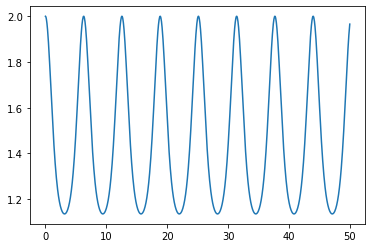

In [51]:
plt.plot(t, g(t))

Okay, great!  

## Euler's Method

For our first method, we will approximate the solution by computing the next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

In [47]:
def eulerMethod(function,initialValue,intervalForSolution):
  array = []
  y=initialValue
  h = intervalForSolution[1]-intervalForSolution[0]
  for i in intervalForSolution:
    array.append([y])
    y = y + f(i,y)*h
  return np.array(array)




In [52]:
mysol = eulerMethod(f,2,t)


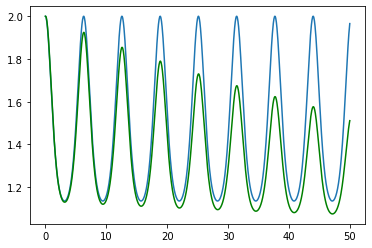

In [53]:
plt.plot(t, g(t))
plt.plot(t, mysol,'g')

I played with this a bit, I wanted to see a difference.

##Runge-Kutta 4th Order

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [54]:
def rungeKutta(function, initialValue, intervalForSolution):
  h = intervalForSolution[1]-intervalForSolution[0]
  y = initialValue
  sol = []
  for i in intervalForSolution:
    sol.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(sol)

In [55]:
rsol = rungeKutta(f,2,t)

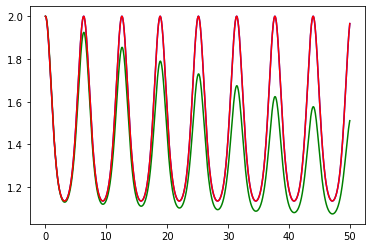

In [56]:
plt.plot(t, g(t),'b')
plt.plot(t, mysol,'g')
plt.plot(t,rsol,'r')

We see that the Euler method degrades over time but the Runge-Kutta method does not!